In [31]:
from matplotlib import pyplot as plt
import openmc
import numpy as np
import pandas as pd
from typing import Any
from helpers import optimal_bins_fd

In [32]:
data: Any = openmc.read_collision_track_file("../data/raw/collision_track.h5")

df = pd.DataFrame(
    {
        "r_x": data["r"]["x"],
        "r_y": data["r"]["y"],
        "r_z": data["r"]["z"],
        "u_x": data["u"]["x"],
        "u_y": data["u"]["y"],
        "u_z": data["u"]["z"],
        "E": data["E"],
        "dE": data["dE"],
        "time": data["time"],
        "wgt": data["wgt"],
        "event_mt": data["event_mt"],
        "delayed_group": data["delayed_group"],
        "cell_id": data["cell_id"],
        "nuclide_id": data["nuclide_id"],
        "material_id": data["material_id"],
        "universe_id": data["universe_id"],
        "n_collision": data["n_collision"],
        "particle": data["particle"],
        "parent_id": data["parent_id"],
        "progeny_id": data["progeny_id"],
    }
)

print(len(df))
df.head()

1243305


,r_x,r_y,r_z,u_x,u_y,u_z,E,dE,time,wgt,event_mt,delayed_group,cell_id,nuclide_id,material_id,universe_id,n_collision,particle,parent_id,progeny_id
0,-4.288282,-27.689668,1.080617,0.099683,-0.835526,0.540333,6.558744e+03,0.000000,0.000758,0.0,101,0,3,50100,2,1,11,0,6504,68
1,-2.316636,-26.570603,1.535584,0.452123,0.118801,0.884008,2.231759e+06,518354.871465,38.833478,1.0,2,0,3,50100,2,1,1,0,6504,78
2,-2.139823,-26.524143,1.881296,0.674453,-0.219208,-0.705025,1.713405e+06,407878.840630,38.833478,1.0,2,0,3,50100,2,1,2,0,6504,78
3,-2.084413,-26.542152,1.823374,0.012012,-0.122434,-0.992404,1.305526e+06,68052.868233,38.833478,1.0,2,0,3,50100,2,1,3,0,6504,78
4,-2.078985,-26.597480,1.374911,-0.333983,0.692984,-0.638928,1.237473e+06,108548.578073,38.833478,1.0,2,0,3,50100,2,1,4,0,6504,78


In [33]:
timestamps = np.sort(df["time"].values)

detector1_times = timestamps[df["cell_id"] == 2]
detector2_times = timestamps[df["cell_id"] == 3]

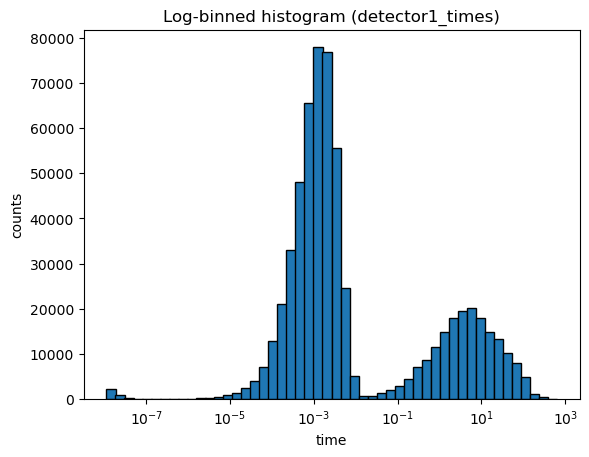

In [34]:
# Compute log-spaced histogram bins and counts for detector1_times

# Prepare timestamps: ensure numeric, finite, and strictly positive (log bins require > 0)
t = np.asarray(detector1_times, dtype=float)
t = t[np.isfinite(t)]
t = t[t > 0]

if t.size == 0:
    raise ValueError("No positive timestamps found in detector1_times; cannot compute log bins.")

# Number of log bins (adjust as needed)
nbins = 50

edges = np.logspace(np.log10(t.min()), np.log10(t.max()), nbins + 1)

# Compute histogram counts in log-spaced bins
counts, edges = np.histogram(t, bins=edges)
centers = np.sqrt(edges[:-1] * edges[1:])  # geometric mean for log bins
widths = edges[1:] - edges[:-1]

# Make a DataFrame for easy inspection
hist_df = pd.DataFrame(
    {
        "count": counts,
        "left": edges[:-1],
        "right": edges[1:],
        "center": centers,
        "width": widths,
    }
)

hist_df.head()

# Optional: plot the histogram on a log x-axis
fig, ax = plt.subplots()
ax.bar(centers, counts, width=widths, align="center", edgecolor="k")
ax.set_xscale("log")
ax.set_xlabel("time")
ax.set_ylabel("counts")
ax.set_title("Log-binned histogram (detector1_times)")
plt.show()